In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import xarray as xr
import pandas as pd
from acIndUtils import acIndUtils, acIndSSTGraphicUtils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Setting all the parameters**

In [13]:
areaPerimeter = pd.read_csv ("areas/areaAdriatic.csv")

In [14]:
rawDataFileSpec = acIndUtils.acNcFileSpec(ncFileName="CMEMS_SST.nc", varName="thetao", xVarName="lon", yVarName="lat", tVarName="time" )
rawDataFileSpec.printSpec()
ncClippedDataFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="clippedData.nc")
annualMapsNcFileSpec = acIndUtils.acCloneFileSpec(ncClippedDataFileSpec, ncFileName="clippedAnnualMean.nc", tVarName="year")
winterMapsNcFileSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="clippedWinterMean.nc")
summerMapsNcFileSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="clippedSummerMean.nc")
trendMapNcSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="trendMap.nc")
meanTimeSeriesCsv = "meanTimeSeries.csv"

  ncFileName: CMEMS_SST.nc
  varName: thetao
  xVarName: lon
  yVarName: lat
  zVarName: 
  tVarName: time


**Generating the pre-aggregates**

In [15]:
print("clipping the data over the region (may require some time)")
clippedData = acIndUtils.acClipDataOnRegion(rawDataFileSpec, areaPerimeter, ncClippedDataFileSpec.ncFileName)
print("  done")

clipping the data over the region (may require some time)
CMEMS SST Dimension: <acIndUtils.acIndUtils.acNcFileSpec object at 0x7f1f9014a450>
Clipped Area Dimensions:            LON        LAT
0    19.641391  39.744436
1    18.375273  39.798191
2    18.391109  39.816245
3    18.399336  39.899609
4    18.399436  39.936100
..         ...        ...
413  19.694582  39.794718
414  19.673055  39.793055
415  19.650836  39.772500
416  19.640000  39.756664
417  19.641391  39.744436

[418 rows x 2 columns]
Reseized Area: <xarray.Dataset>
Dimensions:  (time: 12053, lat: 146, lon: 188)
Coordinates:
  * time     (time) datetime64[ns] 1987-01-01T12:00:00 ... 2019-12-31T12:00:00
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
Data variables:
    thetao   (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.8
saving to  clippedData.nc
finished saving
  done


In [16]:
print("computing the map of annual means (may require some time)")
acIndUtils.acGenerate2DAnnualMeanMaps(ncClippedDataFileSpec, annualMapsNcFileSpec.ncFileName)
print("  done")

computing the map of annual means (may require some time)
  done


In [8]:
print("computing the map of winter means (may require some time)")
acIndUtils.acGenerate2DSeasonalWinter(ncClippedDataFileSpec, winterMapsNcFileSpec.ncFileName)
print("  done")

computing the map of winter means (may require some time)
  done


In [9]:
print("computing the map of summer means (may require some time)")
acIndUtils.acGenerate2DSeasonalSummer(ncClippedDataFileSpec, summerMapsNcFileSpec.ncFileName)
print("  done")

computing the map of summer means (may require some time)
  done


In [17]:
clippedData1Dcsv = acIndUtils.acGenerateMeanTimeSeries(ncClippedDataFileSpec, meanTimeSeriesCsv)

In [18]:
clippedData1Dcsv

time
1987-01-01 12:00:00    13.981805
1987-01-02 12:00:00    13.951108
1987-01-03 12:00:00    13.931457
1987-01-04 12:00:00    13.849789
1987-01-05 12:00:00    13.725996
                         ...    
2019-12-27 12:00:00    16.223177
2019-12-28 12:00:00    16.133165
2019-12-29 12:00:00    15.948340
2019-12-30 12:00:00    15.800557
2019-12-31 12:00:00    15.685452
Name: thetao, Length: 12053, dtype: float32

In [13]:
print("computing the trend map")
acIndUtils.acComputeSenSlopeMap(annualMapsNcFileSpec, trendMapNcSpec.ncFileName)

computing the trend map
Output: <xarray.Dataset>
Dimensions:  (lat: 146, lon: 188)
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
Data variables:
    thetao   (lat, lon) float64 0.03048 0.02979 0.02908 0.02848 ... nan nan nan
output  min: <xarray.DataArray 'thetao' ()>
array(0.0232594)
Coordinates:
    depth    float32 ...
output max: <xarray.DataArray 'thetao' ()>
array(0.05649999)
Coordinates:
    depth    float32 ...


<xarray.Dataset>
Dimensions:  (lat: 146, lon: 188)
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
Data variables:
    thetao   (lat, lon) float64 0.03048 0.02979 0.02908 0.02848 ... nan nan nan

**Generating the plots**

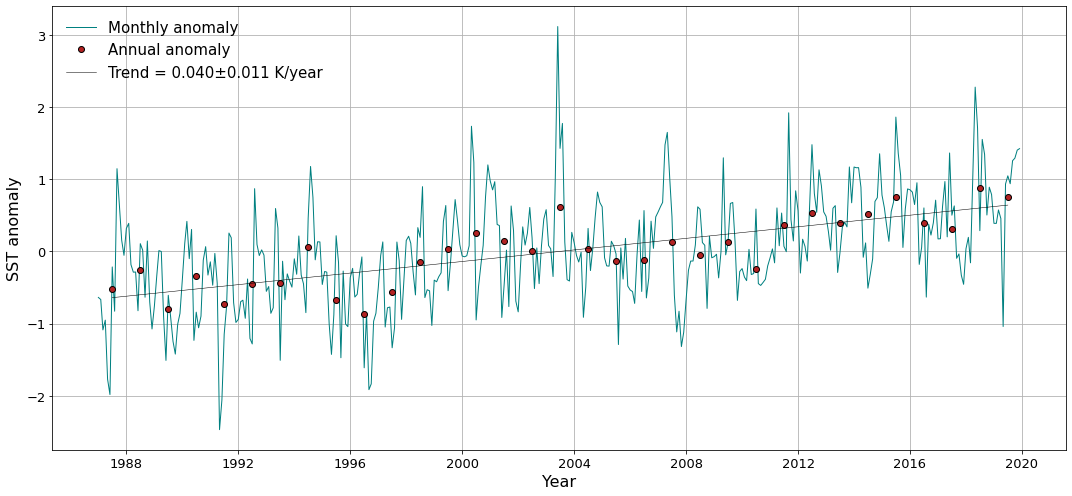

In [19]:
figSSTTimeSeries = acIndSSTGraphicUtils.acPlotSSTTimeSeries(meanTimeSeriesCsv)

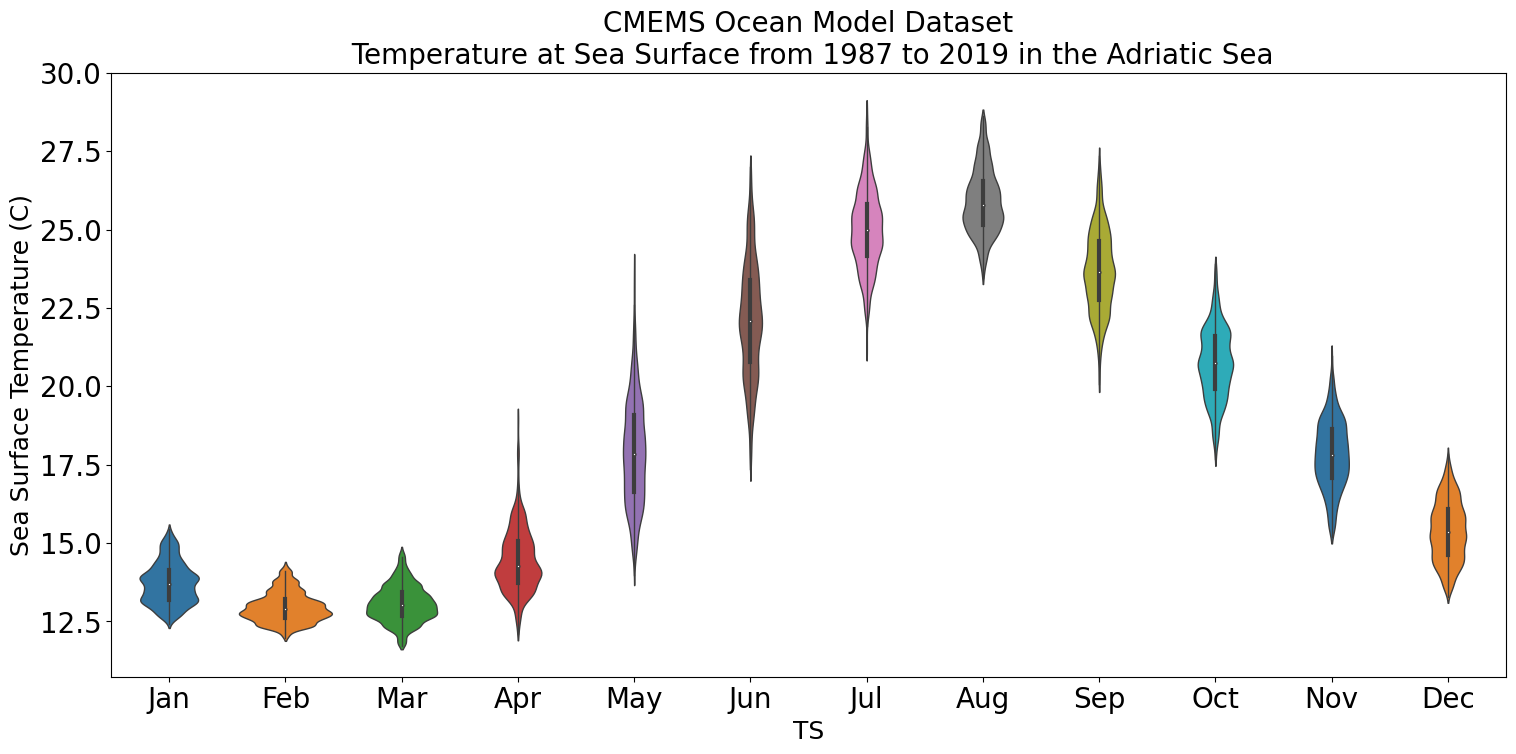

In [20]:
figSSTViolinPlot = acIndSSTGraphicUtils.acGenerateViolinPlotOfDailyData(meanTimeSeriesCsv)

/home/lmentaschi/usr/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/lmentaschi/usr/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


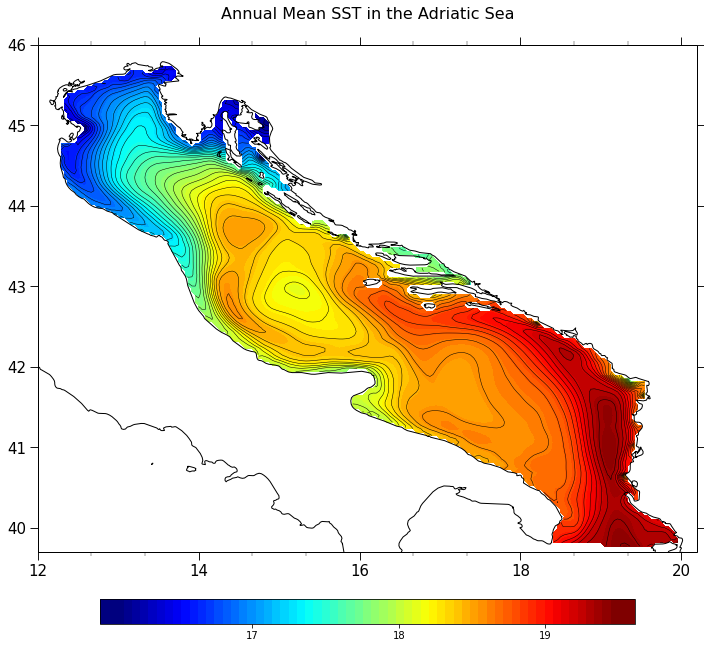

In [21]:
meanPlot = acIndSSTGraphicUtils.plotMeanMap(annualMapsNcFileSpec, areaPerimeter, "Mean SST in the Adriatic Sea")

/home/lmentaschi/usr/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/lmentaschi/usr/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


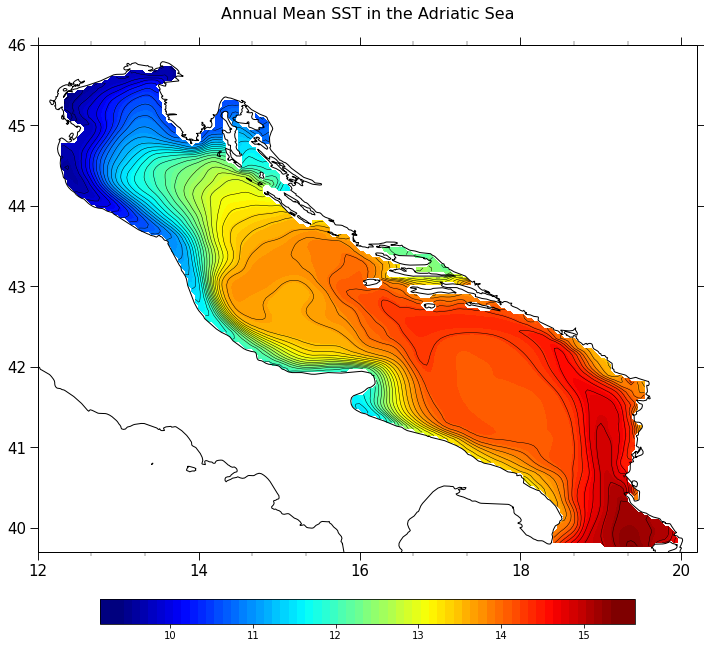

In [9]:
winterPlot = acIndSSTGraphicUtils.plotMeanMap(winterMapsNcFileSpec, areaPerimeter, "Mean Winter SST in the Adriatic Sea")

/home/lmentaschi/usr/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/lmentaschi/usr/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


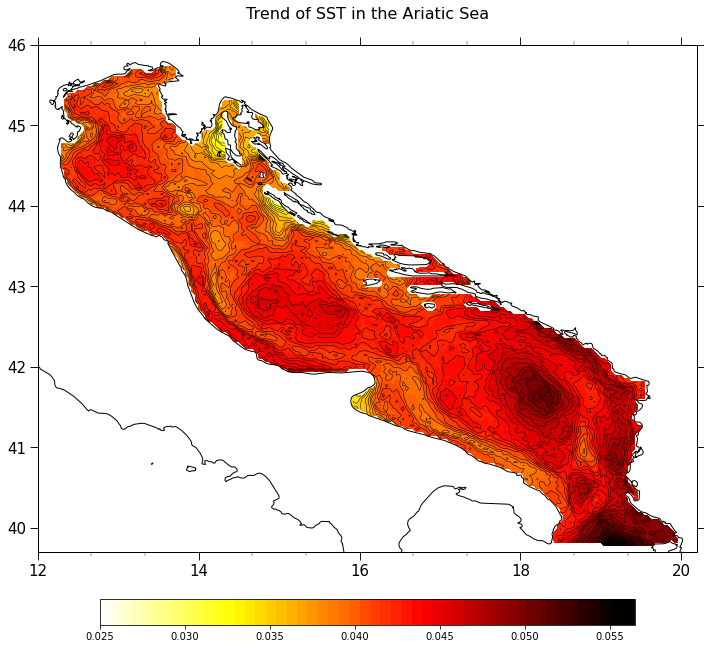

In [22]:
trendMapPlot = acIndSSTGraphicUtils.plotTrendMap(trendMapNcSpec, areaPerimeter)